<a href="https://colab.research.google.com/github/SyedIftikharZaidi/Machine_Learning/blob/main/Projects/FlightPrice_Prediction_Using_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Clean_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.head(-15)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300133,300133,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.17,49,51457
300134,300134,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,19.92,49,51457
300135,300135,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,22.75,49,51457
300136,300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457


###**Data Exploration (EDA)**

Let's see first how many airlines, destination cities and sources cities do we have:

In [5]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [6]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [7]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [8]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [9]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [10]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [11]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [12]:
df['duration'].head()

,duration
0,2.17
1,2.33
2,2.17
3,2.25
4,2.33


In [13]:
df['duration'].min()

0.83

In [14]:
df['duration'].max()

49.83

In [15]:
df['duration'].median()

11.25

###**Data Preprocessing**

Our features and which features we will drop and how we will convert few features into which form are written below:

1. [unnamed] (Drop)
2. [airline] (one hot encode)
3. [flight] (Drop)
4. [source_city] (One hot encode)
5. [departure_time] (One hot encode)
6. [arrival_time] (One hot encode)
7. [destination_city] (One hot encode)
8. [stops] (convert into numerical feature)
9. [class] (binary feature)
10. [duration,days_left, price] (these features will stay remain in same form)]

In [16]:
df = df.drop('Unnamed: 0', axis = 1)
df= df.drop('flight', axis = 1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [17]:
df.stops = pd.factorize(df.stops)[0]

In [18]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [19]:
df = pd.get_dummies(df,columns=['airline','source_city','destination_city','departure_time','arrival_time'], dtype='int')

In [20]:
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


As you can see above, there is not any single feature left which is in any kind of string form. We converted all of or input features into numerical data.

### **Model Building**

**Train A Regression Model**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X, y = df.drop('price', axis=1), df.price


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Make predictions
#y_pred = model.predict(X_test)
# Model Evaluation
#r2 = r2_score(y_test, y_pred)
#print(f'R2 Score: {r2}')
model.score(X_test,y_test)

0.9849288073030925

In [25]:
import math
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

R2 Score: 0.9849288073030925
RMSE: 2787.2805163450043
MSE: 7768932.676796474
MAE: 1077.613542694079


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

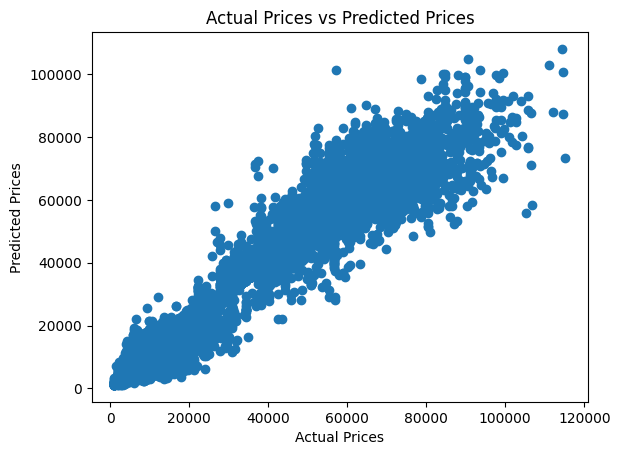

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

### **An Extra Part**

Now, let's try to look at which kind of features are the most relevant for our problem:

In [27]:
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
sorted_importance = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importance

[('class', 0.8798560857287681),
 ('duration', 0.057791207787760576),
 ('days_left', 0.018508576042534097),
 ('airline_Vistara', 0.005067151561418624),
 ('airline_Air_India', 0.0048956002504170325),
 ('source_city_Delhi', 0.0037971858159570097),
 ('destination_city_Delhi', 0.0034616424571033517),
 ('source_city_Mumbai', 0.0022835889597431144),
 ('stops', 0.0019040529924123323),
 ('destination_city_Mumbai', 0.0018744317789452165),
 ('destination_city_Kolkata', 0.0017846911450214735),
 ('source_city_Kolkata', 0.001686147649307502),
 ('arrival_time_Evening', 0.0015250196408520948),
 ('destination_city_Hyderabad', 0.001524793699358539),
 ('destination_city_Bangalore', 0.001283144795219597),
 ('source_city_Hyderabad', 0.001239393098329126),
 ('arrival_time_Night', 0.0011216054570902276),
 ('source_city_Bangalore', 0.0011164257330822584),
 ('departure_time_Evening', 0.0010910983995912169),
 ('arrival_time_Afternoon', 0.0009661641607350311),
 ('source_city_Chennai', 0.0008631800250885862),
 ('

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'class'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'days_left'),
  Text(3, 0, 'airline_Vistara'),
  Text(4, 0, 'airline_Air_India'),
  Text(5, 0, 'source_city_Delhi'),
  Text(6, 0, 'destination_city_Delhi'),
  Text(7, 0, 'source_city_Mumbai'),
  Text(8, 0, 'stops'),
  Text(9, 0, 'destination_city_Mumbai')])

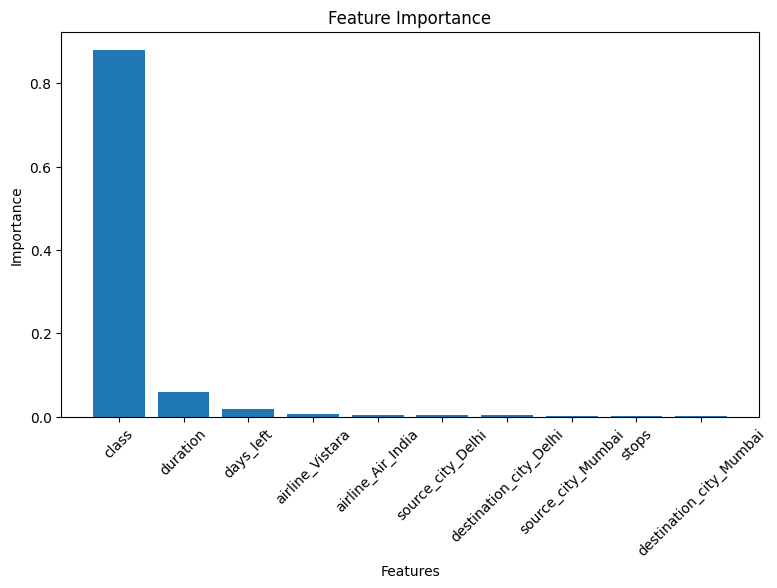

In [29]:
plt.figure(figsize=(9, 5))
plt.bar([x[0] for x in sorted_importance[:10]], [x[1] for x in sorted_importance[:10]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)